In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions # 데이터 사이언스 작업라이브러리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [9]:
# 전처리

df = pd.read_csv('./knn_data/Iris.csv')
print(df.sample(5))

df = df.drop(["Id"], axis = 1)
print(df['Species'].unique())

df["Species"] = df['Species'].map({"Iris-setosa" : 0, "Iris-versicolor":1, 'Iris-virginica':2})


print("\n\n 전처리1단계 : \n ", df)

X_data = df[["SepalLengthCm",  "SepalWidthCm",  "PetalLengthCm",  "PetalWidthCm"]]
Y_data = df["Species"]

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2)

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
98  99            5.1           2.5            3.0           1.1   
62  63            6.0           2.2            4.0           1.0   
71  72            6.1           2.8            4.0           1.3   
92  93            5.8           2.6            4.0           1.2   
49  50            5.0           3.3            1.4           0.2   

            Species  
98  Iris-versicolor  
62  Iris-versicolor  
71  Iris-versicolor  
92  Iris-versicolor  
49      Iris-setosa  
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


 전처리1단계 : 
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6      

120
[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.1        0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.1        0.1        0.1        0.1        0.1        0.13333333
 0.1        0.13333333 0.1        0.1        0.1        0.33333333
 0.36666667 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.36666667 0.36666667 0.36666667 0.36666667 0.

Text(0, 0.5, 'Mean Error')

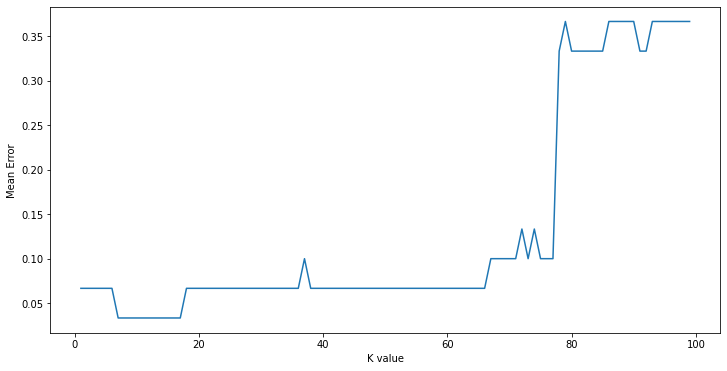

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

error = []

print(len(X_train))

# i 가 1 일때 하나 틀림
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
#     print(pred_i)
    error.append(np.mean(pred_i != Y_test))
    
error = np.array(error)
print(error)
print(error.argmin()+1)

plt.figure(figsize=(12,6))
plt.plot(range(1,100), error)
plt.xlabel("K value")
plt.ylabel("Mean Error")

96.67 % 


<Figure size 432x288 with 0 Axes>

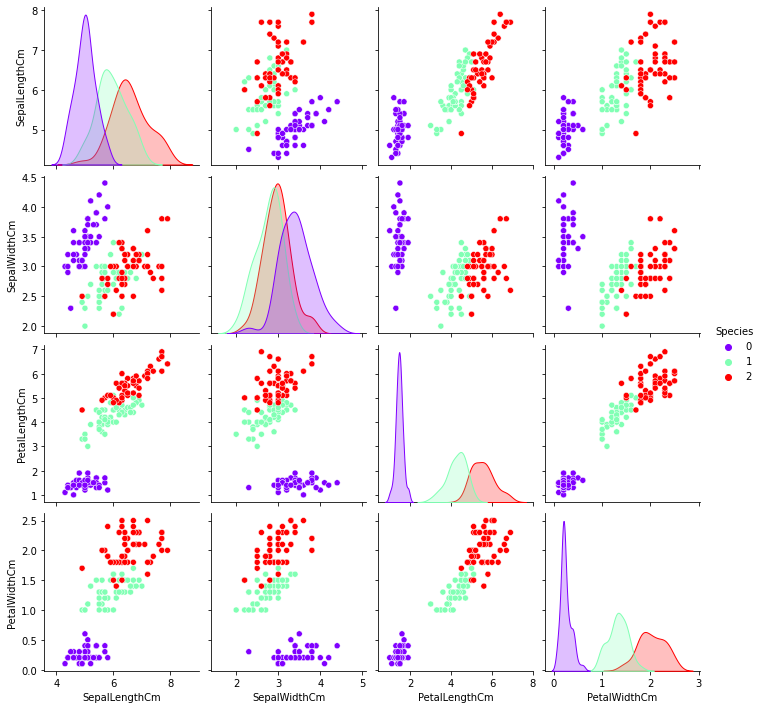

In [19]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test,Y_pred) * 100
print(str(round(accuracy,2)) + ' % ')




plt.figure()
# print(df.sample(10))

sns.pairplot(df, hue = "Species", palette="rainbow")
